# Atividade de Sala - K-means

In [3]:
import pandas as pd
import numpy as np

In [13]:

# 1. Carregar o dataset (sem cabeçalho!)
seeds_df = pd.read_csv('seeds.csv', header=None)
seeds_df



,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [14]:
# 2. Converter para array NumPy
seeds_array = seeds_df.to_numpy()
seeds_array


array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]],
      shape=(210, 8))

In [6]:
# 3. Separar os dados (X) — não há rótulo (unsupervised learning)
# Se a última coluna for a classe (mesmo sem usar), use: X = seeds_array[:, :-1]

X = seeds_array


In [7]:
# 4. Separar 70% para treino e 30% para simulação de amostras
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [16]:
# 5. Treinamento com K-Means
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [ ]:


labels = model.predict(X_train)  # rótulos dos clusters no treino
print("Rótulos do treino:")
print(labels)



Rótulos do treino:
[1 1 2 2 0 0 0 0 0 1 1 2 0 1 2 1 0 2 1 0 0 2 2 0 0 1 0 1 1 1 1 2 0 1 2 0 0
 1 0 0 2 2 0 0 2 2 2 0 0 1 2 1 2 1 0 2 2 2 2 0 2 2 1 2 0 0 0 0 1 0 2 2 1 2
 2 0 1 2 0 2 0 1 0 0 2 2 2 0 1 0 0 1 1 1 2 2 1 0 0 0 2 1 0 2 1 2 0 2 2 0 0
 1 0 2 2 2 0 0 1 0 0 2 2 1 1 2 2 0 0 2 1 2 1 1 1 1 1 1 2 0 2 1 1 0 1 2 1]


In [12]:

test_labels = model.predict(X_test)  # rótulos dos clusters no teste
print("Rótulos do teste:")
print(test_labels)

Rótulos do teste:
[0 2 1 2 2 2 0 2 0 2 1 2 2 1 0 1 2 0 2 1 1 0 2 1 1 2 0 1 0 2 2 0 1 0 1 0 2
 1 1 2 2 2 2 1 2 0 2 1 0 0 0 2 1 0 2 0 0 0 0 0 2 0 1]


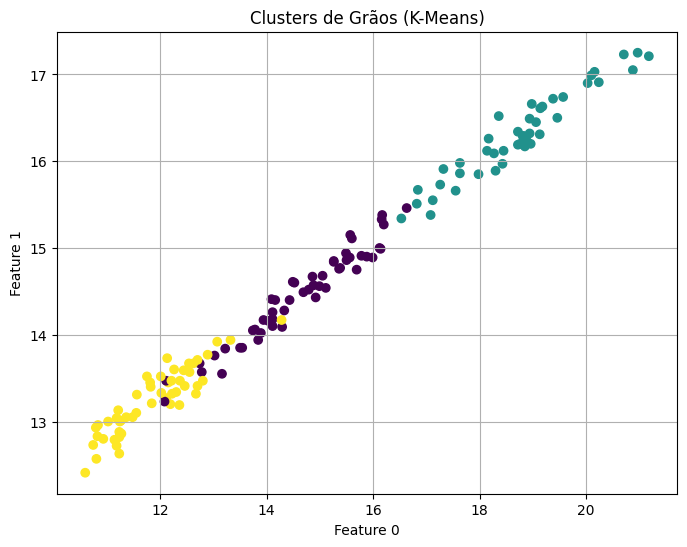

In [18]:
# 6. Avaliação: atribuir rótulos ao teste e calcular score de silhueta
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis')
plt.title('Clusters de Grãos (K-Means)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.grid(True)
plt.show()